# 1 Workflow to integrate the Athal2 (infected) quantification files

#### Dataset2: Infected - Arabidopsis (Col-0)

Cynthia Soto <br>
Fecha: 28 de Octubre 2020<br>
Datatype representation: expression levels CDS (gene_name) <br>
Data quantify with HTSeq (alignments done with STAR SA) <br>

***Case:*** <br>
The data quantifications produced with HTSeq are given in absolute values. Therefore, it is necessary to transform the data to some scale that is appropriate for further analysis. In this case, I will apply the Log2 transformation to the data after plus 1 to avoid arithmetic errors.

***Workflow:***<br>
1) Explore data & get the correct format (remove or add headers; remove not informative data, etc.)<br>
2) Get basic statics & counts in zeros.<br>
3) Transform absolute counts into Log2 counts. <br>
4) Get basic statics onto Log2 values. <br>
5) Create log2 files & statistics files in cvs format for further analysis. <br>

In [99]:
import pandas as pd
import numpy as np
import os 
import glob

In [100]:
try:
    # Change the current working Directory to the quantification dir
    #os.chdir("/home/cyntsc/Proyectos/athal1_htseq-counts/")
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")
s_path=os.getcwd()
print(s_path)

Directory changed
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts


In [101]:
#print(os.listdir(os.getcwd()) # list files in Dir
os.listdir(os.getcwd())

['SRR6283147',
 'Readme.md',
 'SRR364399_Log2.csv',
 'SRR3383696',
 'my_statistics_HTSeq_counts.txt',
 'SRR364398',
 'SRR10586397pe',
 'all_log2_counter_cero.csv',
 'SRR364389',
 'SRR364390',
 'SRR6283148_Log2.csv',
 'SRR6283147_Log2.csv',
 'SRR3383696_Log2.csv',
 'SRR3383780_Log2.csv',
 'all_log2_12_ceros.csv',
 'SRR10586399pe',
 'SRR3383697',
 'SRR10586397pe_Log2.csv',
 'SRR10586399pe_Log2.csv',
 'SRR3383779_Log2.csv',
 'SRR3383697_Log2.csv',
 'SRR364390_Log2.csv',
 'SRR3383779',
 'all_samples_log2.csv',
 'SRR364399',
 'SRR364389_Log2.csv',
 'SRR3383780',
 'my_statistics_HTSeq.sh',
 'SRR6283148',
 'SRR364398_Log2.csv',
 'athal1_zeroLog2_counts.png']

In [102]:
#for file in glob.glob("SRR*"):
#    print(file)

### Here, are created two relevant data files:
<ol>
<li>The log2 transformated values: *_Log2.csv </li>
<li>The basic stats about the data distributions: *_stats.csv</li>
</ol>

In [103]:
## TRANSFORM values from absolute to log2
## Take in account to remove rows with statistic data produced by the quantification tool or meta-data that are not relevant in this point
## It is assumed that files contains just "Genes and Counts"
for file in glob.glob("SRR*"):
    print(file)
    df= pd.read_csv(file, sep='\t', header=None)
    # Add column-names
    try:
        df.columns = ["Genes","Counts"]
        #print(df.head(3))      #print(df.shape)            #print(df.tail(5))
        df.drop(df.tail(5).index,inplace=True) # drop last n rows (refering statistics of HTSeq)
        #print(df.tail(5))
        ## Plus 1 to avoid arithmetical error in Log2 transformation (avoid error div/0)
        df["Counts"] += 1
        ## Apply Log2 numpy function to absolute values and add a column
        df['log2_value'] = np.log2(df['Counts'])
        #print(df.head(3))
        ## CREATE NEW file_Log2.csv
        #df.to_csv(str(file)+'_Log2.csv', sep='\t', index=True)
        
        ## check zero values across genes based on abs.val and log2.val to add to the basic stats df
        genes_in_cero = df.isin([0]).sum()
        #print(genes_in_cero)
        ## CREATE NEW file with basic statistics *_stats.csv
        df_stats=df.describe()
        #print(df_stats.columns)
        df_stats.loc['Zeros'] = [genes_in_cero['Counts'],genes_in_cero['log2_value']]      # adding a row
        df_stats.loc['sample'] = [file, file]                                              # adding a row
        #print(df_stats)            # print(df_stats.columns)
        #df_stats.to_csv('../../../athal2_stats/'+str(file)+'_stats.csv', sep='\t')
    except:
        pass # doing nothing on exception, not processed because it is already pre-processed"

SRR6283147
SRR364399_Log2.csv
SRR3383696
SRR364398
SRR10586397pe
SRR364389
SRR364390
SRR6283148_Log2.csv
SRR6283147_Log2.csv
SRR3383696_Log2.csv
SRR3383780_Log2.csv
SRR10586399pe
SRR3383697
SRR10586397pe_Log2.csv
SRR10586399pe_Log2.csv
SRR3383779_Log2.csv
SRR3383697_Log2.csv
SRR364390_Log2.csv
SRR3383779
SRR364399
SRR364389_Log2.csv
SRR3383780
SRR6283148
SRR364398_Log2.csv


In [104]:
print(str(os.getcwd()))
try:
    # Change the current working Directory to the quantification dir
    #os.chdir("/home/cyntsc/Proyectos/athal1_htseq-counts/")
    os.chdir("/home/cyntsc/Proyectos/athal2_stats/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")
    s_path=os.getcwd()
    print(s_path)

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts
Directory changed


### Here all stats files are integrated in one file to plot it
Important note: when re-running this piece of code be sure to erase the **allsample_stats.csv** file from your work directory before running again

In [105]:
bfirst_file=True
for file in glob.glob("*_stats.csv"):
    print(file)
    df_tmp=pd.read_csv(file, sep='\t', header=None, index_col=False)
    #print(df_tmp)
    #df_tmp.drop(df_tmp.index[:0], inplace=True)
    # drop index 0 and 1 -- rows
    #print(df_tmp)
    df = df_tmp.T
    df.drop(df.index[:1], inplace=True)
    # drop index 0 (somelike headers) -- rows
    if bfirst_file==True:
        df_all=df
        bfirst_file=False
        #print(df_all)
    else:
        df_all=df_all.append(df)
        #print(df_all)
        pass
    
print(df_all)
df_all.to_csv('allsample_stats.csv', sep='\t', header=None, index=None)

SRR10586399pe_stats.csv
SRR6283148_stats.csv
SRR364389_stats.csv
SRR364398_stats.csv
SRR364390_stats.csv
SRR3383780_stats.csv
SRR3383779_stats.csv
SRR364399_stats.csv
SRR3383696_stats.csv
SRR3383697_stats.csv
SRR6283147_stats.csv
SRR10586397pe_stats.csv
            0        1                   2                   3    4  \
1      Counts  27655.0   654.3140119327427   2662.125851662074  1.0   
2  log2_value  27655.0   5.807581742515993   3.984069684187342  0.0   
1      Counts  27655.0   198.2109202675827  1592.9854152909852  1.0   
2  log2_value  27655.0   3.061983132419056  3.3298933121980028  0.0   
1      Counts  27655.0  330.28794069788466  1504.5445963960638  1.0   
2  log2_value  27655.0   4.978140600059208  3.7955198257345724  0.0   
1      Counts  27655.0  316.55454709817394   1396.939527121289  1.0   
2  log2_value  27655.0   4.748695734472369  3.7099003586476047  0.0   
1      Counts  27655.0   325.6518531911047  1484.6011426997072  1.0   
2  log2_value  27655.0    4.96057404

In [106]:
#set columns to apply filters by name
df_all.columns = ['Metric','count','mean','std','min','25%','50%','75%','max','Zeros','sample']

In [107]:
## Filter data for plotting the log2 statistics
is_log2=df_all['Metric']=='log2_value'
df_plot=df_all[is_log2] 
#df_plot.set_index('sample', inplace=True)
print(df_plot.index)
df_plot

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype='int64')


,Metric,count,mean,std,min,25%,50%,75%,max,Zeros,sample
2,log2_value,27655.0,5.807581742515993,3.984069684187342,0.0,1.584962500721156,6.700439718141092,9.060695931687555,17.605956903531055,5703.0,SRR10586399pe
2,log2_value,27655.0,3.061983132419056,3.3298933121980028,0.0,0.0,2.0,5.584962500721156,16.665294274755347,10866.0,SRR6283148
2,log2_value,27655.0,4.978140600059208,3.7955198257345724,0.0,0.0,5.807354922057604,8.18734995089415,17.207900856629784,7164.0,SRR364389
2,log2_value,27655.0,4.748695734472369,3.7099003586476047,0.0,0.0,5.285402218862249,7.845490050944375,16.12724876816099,7117.0,SRR364398
2,log2_value,27655.0,4.96057404796627,3.7914777994860214,0.0,0.0,5.78135971352466,8.167415964059,17.189023396772658,7229.0,SRR364390
2,log2_value,27655.0,5.013277490013133,3.933416521374838,0.0,0.0,5.807354922057604,8.39231742277876,17.338092178481546,7549.0,SRR3383780
2,log2_value,27655.0,4.723590676826614,3.7481006476496654,0.0,0.0,5.426264754702098,7.900866807980749,17.30761885400159,7719.0,SRR3383779
2,log2_value,27655.0,4.75029461089433,3.709542434517706,0.0,0.0,5.285402218862249,7.8548650182718145,16.122180901259753,7090.0,SRR364399
2,log2_value,27655.0,5.009321182175393,3.8832341111492523,0.0,0.0,5.857980995127572,8.303780748177102,17.584786379736883,7518.0,SRR3383696
2,log2_value,27655.0,5.183563929907964,3.985064887029906,0.0,0.0,6.108524456778169,8.554588851677638,17.972749860653227,7375.0,SRR3383697


***Data type conversion***

In [108]:
df_plot.dtypes
# select and format fields to be plotted
df_plot[['mean','std','25%','50%','75%','max','Zeros']] = df_plot[['mean','std','25%','50%','75%','max','Zeros']].apply(pd.to_numeric)
#df_plot["Zeros"] = df_plot['Zeros'].astype('int')
print(df_plot.dtypes)
df_plot=df_plot.filter(['sample','mean','std','25%','50%','75%','max','Zeros']).round(decimals=3)
df_plot

Metric     object
count      object
mean      float64
std       float64
min        object
25%       float64
50%       float64
75%       float64
max       float64
Zeros     float64
sample     object
dtype: object


/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,sample,mean,std,25%,50%,75%,max,Zeros
2,SRR10586399pe,5.808,3.984,1.585,6.700,9.061,17.606,5703.0
2,SRR6283148,3.062,3.330,0.000,2.000,5.585,16.665,10866.0
2,SRR364389,4.978,3.796,0.000,5.807,8.187,17.208,7164.0
2,SRR364398,4.749,3.710,0.000,5.285,7.845,16.127,7117.0
2,SRR364390,4.961,3.791,0.000,5.781,8.167,17.189,7229.0
2,SRR3383780,5.013,3.933,0.000,5.807,8.392,17.338,7549.0
2,SRR3383779,4.724,3.748,0.000,5.426,7.901,17.308,7719.0
2,SRR364399,4.750,3.710,0.000,5.285,7.855,16.122,7090.0
2,SRR3383696,5.009,3.883,0.000,5.858,8.304,17.585,7518.0
2,SRR3383697,5.184,3.985,0.000,6.109,8.555,17.973,7375.0



##  Adding labels from meta-data to setup the output (leyends)


In [109]:
print(str(os.getcwd()))


/home/cyntsc/Proyectos/athal2_stats


In [110]:
file='metadata.csv'
lst_header=["sample","fungus","hpi","ID_sample","good"] 
df_meta=pd.read_csv(file, sep='\,', engine='python', usecols=[0,4]) 
#print(df_meta.index)
print(df_meta)
#df_meta.loc['SRR3383696']

           sample       ID
0      SRR3383696     Bc12
1      SRR3383697     Bc12
2      SRR3383779     Bc18
3      SRR3383780     Bc18
4   SRR10586397pe     Bc24
5   SRR10586399pe     Bc24
6       SRR364389     Ch22
7       SRR364390     Ch22
8       SRR364398     Ch40
9       SRR364399     Ch40
10     SRR6283147     Ss30
11     SRR6283148     Ss30
12    SRR3383640   healthy
13     SRR3383641  healthy
14    SRR3383782   healthy
15     SRR3383783  healthy
16    SRR3383821   healthy
17     SRR3383822  healthy
18    SRR6283144   healthy
19     SRR6283145  healthy


**Join data-main-table with meta-data**

In [111]:
merged_df=df_plot.merge(df_meta, how="left")
merged_df=merged_df.sort_values('ID')
merged_df

,sample,mean,std,25%,50%,75%,max,Zeros,ID
8,SRR3383696,5.009,3.883,0.000,5.858,8.304,17.585,7518.0,Bc12
9,SRR3383697,5.184,3.985,0.000,6.109,8.555,17.973,7375.0,Bc12
5,SRR3383780,5.013,3.933,0.000,5.807,8.392,17.338,7549.0,Bc18
6,SRR3383779,4.724,3.748,0.000,5.426,7.901,17.308,7719.0,Bc18
0,SRR10586399pe,5.808,3.984,1.585,6.700,9.061,17.606,5703.0,Bc24
11,SRR10586397pe,5.862,3.990,1.585,6.794,9.109,17.465,5627.0,Bc24
2,SRR364389,4.978,3.796,0.000,5.807,8.187,17.208,7164.0,Ch22
4,SRR364390,4.961,3.791,0.000,5.781,8.167,17.189,7229.0,Ch22
3,SRR364398,4.749,3.710,0.000,5.285,7.845,16.127,7117.0,Ch40
7,SRR364399,4.750,3.710,0.000,5.285,7.855,16.122,7090.0,Ch40


In [112]:
## Jump: Get zeros for tesis-report ##
df_tmp= merged_df.sort_values('sample')
#df_tmp
col_ceros = df_tmp['Zeros'].tolist()
col_ceros

[5627.0,
 5703.0,
 7518.0,
 7375.0,
 7719.0,
 7549.0,
 7164.0,
 7229.0,
 7117.0,
 7090.0,
 10600.0,
 10866.0]

### Plot quantification metrics 

In [113]:
import matplotlib.pyplot as plt
plt.style.available[:30]    
# 'Solarize_Light2','_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale',  'seaborn'

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [114]:
plt.style.use('classic')    # classic

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


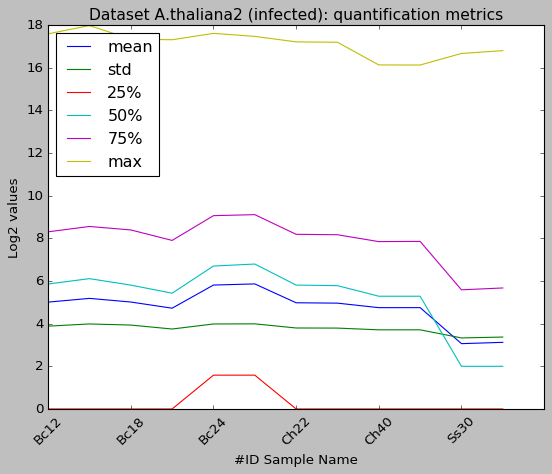

<Figure size 640x480 with 0 Axes>

In [115]:
merged_df.plot(x='ID', y=['mean','std','25%','50%','75%','max'], kind='line', )   #marker='o'
plt.xlabel('#ID Sample Name',color='black')
plt.xticks(rotation=45)
plt.ylabel('Log2 values',color='black')
plt.title('Dataset A.thaliana2 (infected): quantification metrics', fontsize=14)
plt.legend(loc=0)
plt.show()
plt.savefig("athal2_basic_statics.png")

***To plot the lines in the chart (ceros across samples) first need to merge sample*** <br>
Go to notebook 3_merge* file before run this code 

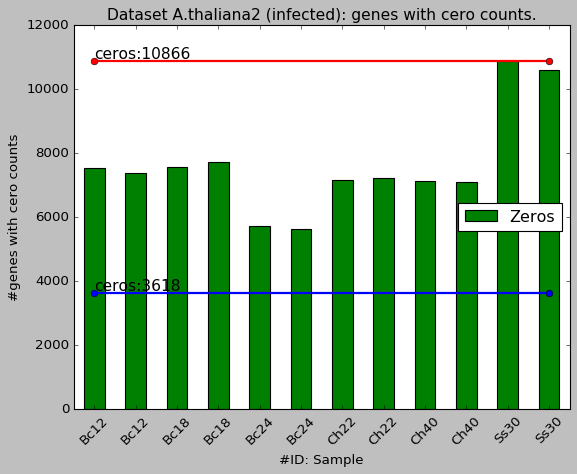

<Figure size 640x480 with 0 Axes>

In [116]:
# More plots
merged_df.plot(x='ID', y='Zeros', kind='bar', color='green')
plt.xlabel('#ID: Sample',color='black')
plt.xticks(rotation=45)
plt.ylabel('#genes with cero counts',color='black')
plt.title('Dataset A.thaliana2 (infected): genes with cero counts.', fontsize=14)
plt.legend(loc=7)

## add arbitrary lines to canvas
plt.plot([0, 11], [10866, 10866], 'k-', lw=2, color='red',marker = 'o')
plt.plot([0, 11], [3618, 3618], 'k-', lw=2, color='blue',marker = 'o')
plt.text(0, 10966, "ceros:10866", fontsize=14)
plt.text(0, 3718, "ceros:3618", fontsize=14)

plt.show()
plt.savefig("athal1_zeroLog2_counts.png")